## Project Description
The goal of this project is to build an AI with text-to-image generative capabilities (text -> image). The aim is to be able to produce an image representing the character of a fiction book we are writing.

### Steps
1. Install necessary dependencies.
2. Load the model.
3. Perform prompt.

### Requirements

**Python**: Python is an interpreted, high-level, general-purpose programming language.

**Integrated Development Environment (IDE)**: Any integrated development environment that can be used to view, edit, and run Python code, such as:

- Google Colab
- Jupyter Notebook
- Kaggle

### Packages

Please install the following packages in Python before running the code.

In [1]:
%time
!pip install -qq diffusers; # <- Type of generative model
!pip install -qq -U peft; # <- Helps improve the performance of pre-trained models
!pip install -qq gradio; # <- Interface

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
distributed 2023.7.1 requires dask==2023.7.1, but you have dask 2024.4.1 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
kfp 2.5.0 requires urllib3<2.0.0, but you have urllib3 2.2.1 which is incompatible.
raft-dask 23.8.0 requires dask==2023.7.1, but you have dask 2024.4.1 which is incompatible.
spacy 3.7.3 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
ydata-profiling

In [2]:
import torch # <- Fundamental library for neural networks
import transformers

from diffusers import DiffusionPipeline  # Facilitates the import of diffusion models from huggingface.co
from diffusers import DDIMScheduler  # Speeds up the process, making the result faster

from huggingface_hub import hf_hub_download  # Allows interaction with the Hugging Face Hub, repository of models
transformers.utils.move_cache()

0it [00:00, ?it/s]

> Note: [Diffusion models](https://www.superannotate.com/blog/diffusion-models#:~:text=Diffusion%20models%20are%20advanced%20machine,learning%20to%20reverse%20this%20process.) are algorithms that learn from data by adding noise and then learning to reverse this process.

## Load Model
The chosen model will be loaded from [Hugging Face](https://huggingface.co/) and it will be the [Hyper-SD model](https://huggingface.co/ByteDance/Hyper-SD).

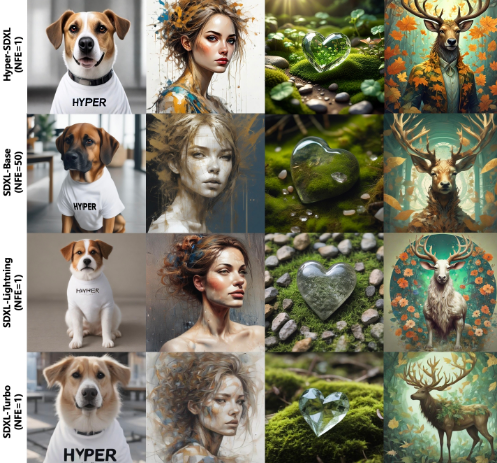


> "Hyper-SD is one of the new State-of-the-Art diffusion model acceleration techniques. In this repository, we release the models distilled from SDXL Base 1.0 and Stable-Diffusion v1-5"

In [3]:
%time
# Model Info
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"  # Model ID
repo_name = "ByteDance/Hyper-SD"  # Location of the model

# Checkpoint
ckpt_name = "Hyper-SDXL-2steps-lora.safetensors"  # Model characteristics (training steps, tuning method)

# Load model
pipe = DiffusionPipeline.from_pretrained(base_model_id,
                                         torch_dtype=torch.float16,
                                         variant="fp16").to("cuda")

# Load a lighter model with fewer parameters
pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))

# Fuse Lora
pipe.fuse_lora()

# Speed up the process of removing noise (diffusion)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

2024-04-28 06:57:08.934664: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 06:57:08.934755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 06:57:09.110350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Hyper-SDXL-2steps-lora.safetensors:   0%|          | 0.00/787M [00:00<?, ?B/s]

> **Note**: LoRA is a training method that selects only a few parameters of the model instead of all.

## Prompt

In [4]:
import matplotlib.pyplot as plt

def text2image(prompt):
    image = pipe(prompt=prompt, 
                 num_inference_steps=2, 
                 guidance_scale=1).images[0]
    
    return image

In [5]:
# Interface
import gradio as gr

demo = gr.Interface(text2image, 
                    inputs="textbox", 
                    outputs="image",
                    theme=gr.themes.Base())

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://3a97585b916dec45d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Author

CLL - [Github](https://github.com/CllsPy)